In [1]:
from sklearn import datasets

In [12]:
mnist = datasets.fetch_openml("mnist_784")

In [18]:
import numpy as np
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [19]:
mnist.target = mnist.target.astype(np.int8)

In [23]:
x = mnist.data
y = mnist.target

In [25]:
y.shape

(70000,)

In [28]:
y[7]

3

In [29]:
import matplotlib
import matplotlib.pyplot as plt

In [31]:
some_digit = x[7]
some_digit_image = some_digit.reshape(28,28)

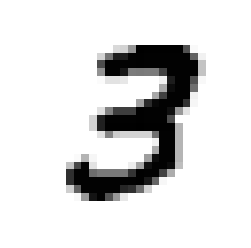

In [34]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [40]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]
shuffle_index = np.random.permutation(len(x_train))
x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]

In [41]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [42]:
y_train_3

array([False, False, False, ..., False, False, False])

In [58]:
class SGDClassifier:
    def __init__(self, y = 5, random_state = None):
        print(random_state, y)
    def fit(self, x,y):
        print("Model is Classified")

In [62]:
sgd_clf = SGDClassifier(random_state=7)

7 5


In [73]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(x_train, y_train_3)
sgd_clf.predict([x[9]])

array([False])

In [75]:
y_pred = sgd_clf.predict(x_train)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
cm = confusion_matrix(y_train_3, y_pred)

In [79]:
cm

array([[51778,  2091],
       [  682,  5449]])

In [81]:
accuracy_score(y_train_3, y_pred)

0.9537833333333333

In [86]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [92]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_3, cv = 3)

In [93]:
len(y_train_pred)

60000

In [95]:
y_score = sgd_clf.decision_function([x[4]])
y_score

array([-525492.2018165])

In [96]:
y_score = cross_val_predict(sgd_clf, x_train, y_train_3, cv = 3, method="decision_function")

In [97]:
len(y_score)

60000

In [98]:
y_score

array([-650616.0798108 , -174593.2134566 , -803596.96481234, ...,
       -988501.4951081 , -143878.05477856, -576037.66354257])

In [99]:
from sklearn.metrics import roc_curve

In [100]:
fpr, tpr, the = roc_curve(y_train_3, y_score)

In [103]:
the

array([ 1194758.9612053 ,  1194757.9612053 ,   720928.09563719, ...,
       -1431169.70071593, -1431239.54337092, -2788837.11031969])

Text(0, 0.5, 'True Positive Rate')

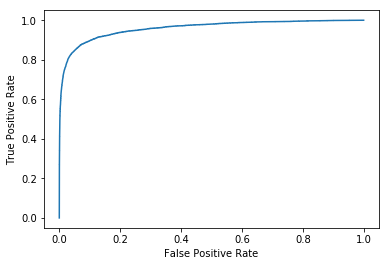

In [104]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [105]:
from sklearn.multiclass import OneVsOneClassifier

In [106]:
sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(x_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [111]:
y_score = sgd_clf.decision_function([x[7]])
y_score

array([[ -382199.6334939 ,  -633665.37341791,   -98818.82168271,
          295278.29908214,  -656160.67794465,  -356656.10076885,
        -1016189.52401579,  -770712.83339789,   -83872.33463201,
         -422471.47102732]])

In [112]:
ovo_clf = OneVsOneClassifier(sgd_clf)
ovo_clf.fit(x_train, y_train)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [113]:
ovo_clf.predict([some_digit])

array([3], dtype=int8)

In [115]:
len(ovo_clf.estimators_)

45

In [116]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 3)

In [117]:
y_train_pred

array([2, 1, 0, ..., 0, 5, 7], dtype=int8)

In [118]:
cm = confusion_matrix(y_train, y_train_pred)

In [119]:
cm

array([[5627,    3,   16,    9,   14,   13,   70,    4,  152,   15],
       [   1, 6251,   62,   26,    7,    9,   14,    9,  346,   17],
       [  47,   70, 4912,  133,  101,   20,  104,   69,  451,   51],
       [  48,   29,  160, 5135,   29,   72,   28,   45,  534,   51],
       [  13,   17,   27,   12, 5066,    2,   43,   18,  253,  391],
       [ 100,   39,   77,  431,  224, 3268,  139,   19,  993,  131],
       [  55,   21,   72,   13,   98,   40, 5491,    6,  108,   14],
       [  32,   22,   75,   44,  111,   13,    5, 5187,  249,  527],
       [  49,   72,   83,  144,   86,   63,   33,   17, 5176,  128],
       [  28,   25,   15,   93,  306,   18,    3,  222,  276, 4963]])

In [121]:
import seaborn as sn

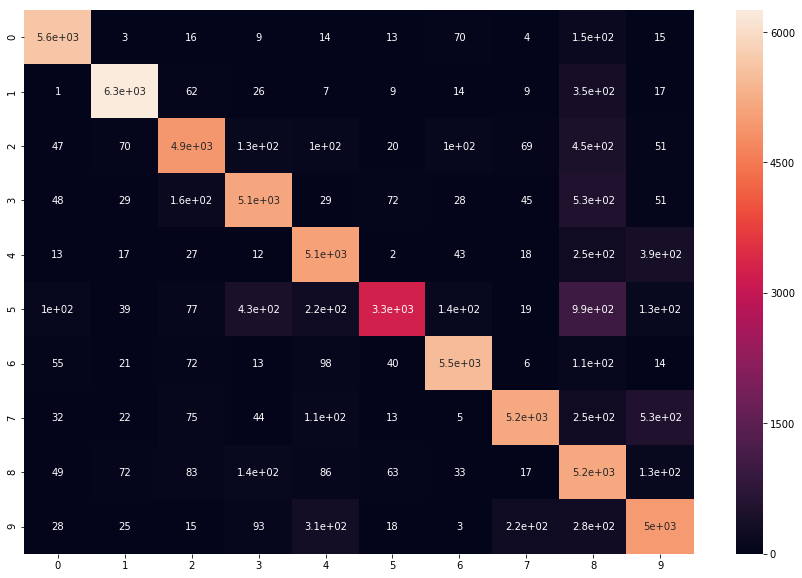

In [122]:
plt.figure(figsize=(15,10))
sn.heatmap(cm, annot=True)
plt.show()